In [2]:
import pandas as pd
from surprise import SVD, accuracy # SVD model 생성, 평가  
from surprise import Reader, Dataset # SVD data set 생성 

# 4. SVD(Singular Value Decomposition) 추천시스템 
# - 차원 축소 기법 중의 하나인 특이값 분해 알고리즘을 적용한 추천시스템 구현 


# 1. 데이터 가져오기 
ratings = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/chap10_Recomm/data/movie_rating.csv')
ratings #    critic(user)    title(movie)  rating

,critic,title,rating
0,Jack,Lady,3.0
1,Jack,Snakes,4.0
2,Jack,You Me,3.5
3,Jack,Superman,5.0
4,Jack,The Night,3.0
5,Mick,Lady,3.0
6,Mick,Snakes,4.0
7,Mick,Just My,2.0
8,Mick,Superman,3.0
9,Mick,You Me,2.0


In [3]:
# 2. rating 데이터셋 생성 : Reader 객체 생성 -> Dataset 생성   
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['critic', 'title', 'rating']], reader)

In [5]:
print("> Building full train/test set...")
# 2. train/test set 생성 
trainset = data.build_full_trainset()
testset = trainset.build_testset()
print("> OK")

> Building full train/test set...
> OK


In [6]:
# 3. model 생성 : train set 이용 
print("SVD model create...")
'''
#help(surprise.SVD) # model 튜닝 : 요인수, 에폭수
Args:
 |      n_factors: The number of factors. Default is ``100``.
 |      n_epochs: The number of iteration of the SGD procedure. Default is ``20``.
'''
#svd_model = surprise.SVD(n_factors=200, n_epochs=30, random_state=123)
svd = SVD()#n_factors=100, n_epochs=20, random_state=123)
svd_model= svd.fit(trainset)

SVD model create...


In [8]:
# 4. 예측치 생성 : test set 이용 
pred = svd_model.test(testset)

# 5. model 평가 
print(accuracy.rmse(pred)) # 평균제곱오차제곱근
print(accuracy.mae(pred)) # 평균절대오차

RMSE: 0.5887
0.588745506869937
MAE:  0.4469
0.44692278561648785


In [9]:
# 6. Toby 사용자 미관람 영화 추천 예측 
# model.predict(사용자id, 아이템id, 실제 평점) : 실제평점=0  
user_id='Toby'
item_ids=['The Night','Just My','Lady'] # 추천 대상 영화  
actual_rating = 0
for item_id in item_ids :
    print(svd_model.predict(user_id, item_id, actual_rating))

user: Toby       item: The Night  r_ui = 0.00   est = 3.30   {'was_impossible': False}
user: Toby       item: Just My    r_ui = 0.00   est = 2.94   {'was_impossible': False}
user: Toby       item: Lady       r_ui = 0.00   est = 3.03   {'was_impossible': False}


In [13]:
############################
## suprise Dataset
############################
from sklearn.model_selection import train_test_split

# 1. dataset download
data = Dataset.load_builtin('ml-100k')
# Dataset ml-100k could not be found. [Y/n]

In [14]:
# 2. rating dataset 
dataset = data.raw_ratings # list
print(len(dataset)) # 100000 
print(dataset[:10]) #[('196', '242', 3.0, '881250949')]
# user, item rate id

100000
[('196', '242', 3.0, '881250949'), ('186', '302', 3.0, '891717742'), ('22', '377', 1.0, '878887116'), ('244', '51', 2.0, '880606923'), ('166', '346', 1.0, '886397596'), ('298', '474', 4.0, '884182806'), ('115', '265', 2.0, '881171488'), ('253', '465', 5.0, '891628467'), ('305', '451', 3.0, '886324817'), ('6', '86', 3.0, '883603013')]


In [15]:
# list -> DF
rating_df = pd.DataFrame(dataset, 
                  columns=["user", "item", "rate", "id"])
del rating_df["id"]
rating_df.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [16]:
# 2. train/test split
from surprise.model_selection import train_test_split# KFold 

# Dataset 자료이용
trainset, testset = train_test_split(data, random_state=0)
print(type(trainset)) # <class 'surprise.trainset.Trainset'>

<class 'surprise.trainset.Trainset'>


In [17]:
# 3. svd model
svd = SVD()
svd_model= svd.fit(trainset)

In [18]:
# 4. 전체 testset 평점 예측
preds = svd_model.test(testset)
print(len(pred)) # 15000

print(preds[:3])

31
[Prediction(uid='269', iid='17', r_ui=2.0, est=2.443909618441902, details={'was_impossible': False}), Prediction(uid='704', iid='382', r_ui=4.0, est=3.571944826211278, details={'was_impossible': False}), Prediction(uid='829', iid='475', r_ui=4.0, est=3.726642721543321, details={'was_impossible': False})]


In [19]:
print('user\tmovie\trate\test rate')
[print(p.uid, p.iid, p.r_ui, p.est, sep='\t') for p in preds[:3]]

user	movie	rate	est rate
269	17	2.0	2.443909618441902
704	382	4.0	3.571944826211278
829	475	4.0	3.726642721543321


[None, None, None]

In [20]:
# 5. model 평가 
accuracy.rmse(preds)

RMSE: 0.9485


0.9485309118817141

In [21]:
# 6.개별 사용자 평점 예측 
# 1) user vs item table
df_table = rating_df.set_index(["user", "item"]).unstack()
df_table.shape # (943, 1682) -> (user, item)

(943, 1682)

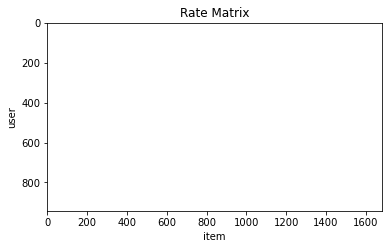

In [22]:
# 2) table imshow
import matplotlib.pyplot as plt

plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [23]:
# 3) table 내용보기 
df_table.iloc[220:250, 601:615] # NaN
df_table.iloc[220:250, 601:615].fillna("")

rate                                                                
item  154 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 155 1550 1551
user                                                                     
298                                                                      
299     4                                                                
3                                                                        
30                                                                       
300                                                                      
301     4                                                     1          
302                                                                      
303                                                           3          
304                                                                      
305     4                                                                
306                                                                      
307     5                                                                
308     4                                                                
309                                                                      
31                                                                       
310                                                                      
311                                                                      
312     4                                                                
313     2                                                     2          
314                                                           5          
315     5                                                                
316                                                                      
317                                                                      
318                                                                      
319                                                                      
32                                                                       
320                                                                      
321                                                                      
322                                                                      
323

In [24]:
uid = [301,303]
iid = [1542, 1543, 1544, 1545]
actual_rating = 0
for user_id in uid :
    est_max = 0 # 2차 작성 
    user = item = est = None # 2차 작성 
    for item_id in iid :
        pred = svd_model.predict(str(user_id), str(item_id), actual_rating)
        print(pred)
        if est_max < pred.est : # 2차 작성 
            est_max = pred.est
            user = user_id; item=item_id; est=est_max
    print(f"user : {user}, item : {item}, est : {est}") # 2차 작성 

user: 301        item: 1542       r_ui = 0.00   est = 3.30   {'was_impossible': False}
user: 301        item: 1543       r_ui = 0.00   est = 3.48   {'was_impossible': False}
user: 301        item: 1544       r_ui = 0.00   est = 3.47   {'was_impossible': False}
user: 301        item: 1545       r_ui = 0.00   est = 3.72   {'was_impossible': False}
user : 301, item : 1545, est : 3.7158892568969306
user: 303        item: 1542       r_ui = 0.00   est = 3.64   {'was_impossible': False}
user: 303        item: 1543       r_ui = 0.00   est = 3.22   {'was_impossible': False}
user: 303        item: 1544       r_ui = 0.00   est = 3.41   {'was_impossible': False}
user: 303        item: 1545       r_ui = 0.00   est = 3.29   {'was_impossible': False}
user : 303, item : 1542, est : 3.636296139873422
